In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2. Exploratory Data Analysis


In [7]:
# use filtered data with no outliers
df = pd.read_csv('2015_filtered.csv', index_col=False)
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,4.395200e+09,510300000.0,0.053000,0.2397,2.745,5.263000e+08,0.0063,0.0,-25.384677,0,Consumer Defensive
1,4.083450e+08,60534500.0,0.042000,0.0713,10.078,5.204137e+07,0.0000,0.0,-24.047624,0,Consumer Defensive
2,3.394800e+09,766900000.0,0.121000,0.2028,7.716,6.061000e+08,0.0158,0.0,8.676289,1,Consumer Defensive
3,7.146230e+08,226524000.0,0.110000,0.1247,12.030,1.562550e+08,0.0000,0.0,5.125095,1,Consumer Defensive
4,5.177078e+09,307952000.0,0.022000,0.1447,14.771,3.185620e+08,0.0111,0.0,33.185500,1,Consumer Defensive
...,...,...,...,...,...,...,...,...,...,...,...
1631,1.236240e+08,9858000.0,0.033000,0.1173,5.048,4.439000e+06,0.0000,0.0,10.882961,1,Technology
1632,5.740290e+07,365139.0,0.003000,0.0213,4.604,7.135220e+05,0.0000,0.0,33.101842,1,Technology
1633,5.800000e+07,5000000.0,-0.017241,0.0713,10.078,-2.000000e+06,0.0000,0.0,34.769228,1,Technology
1634,3.820900e+08,8743000.0,0.015000,0.1508,8.342,8.185000e+06,0.0371,0.0,6.050663,1,Technology


## 2.1 Group by Sector

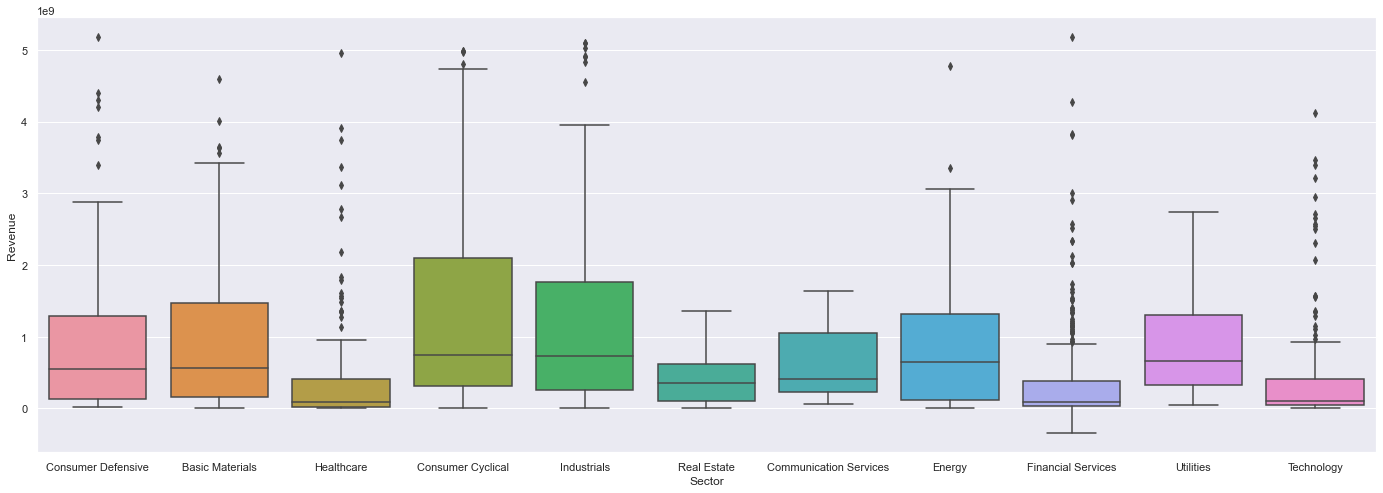

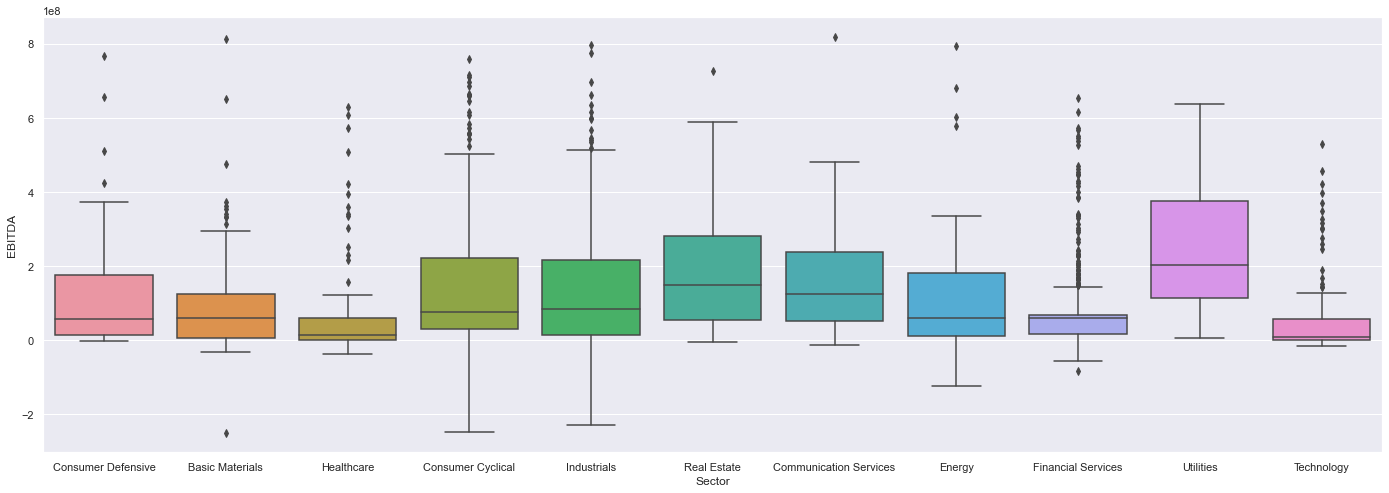

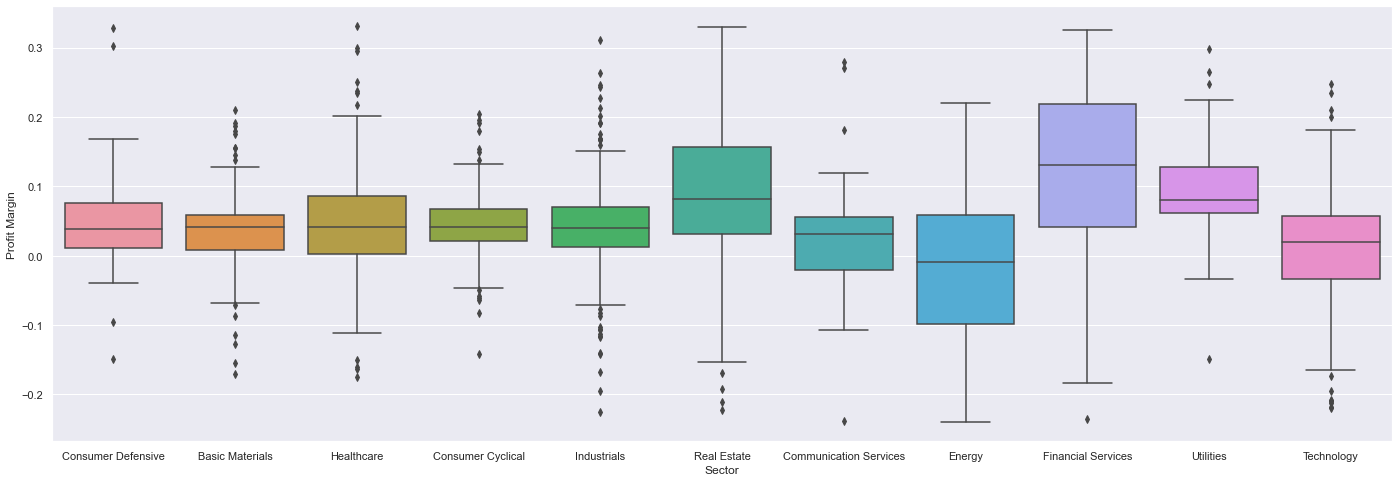

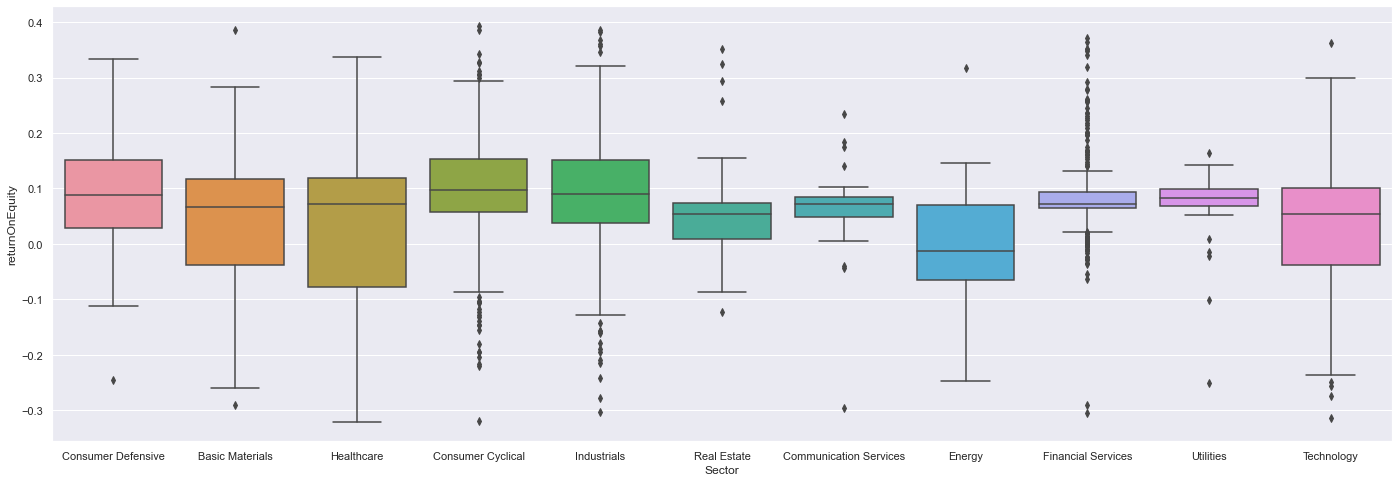

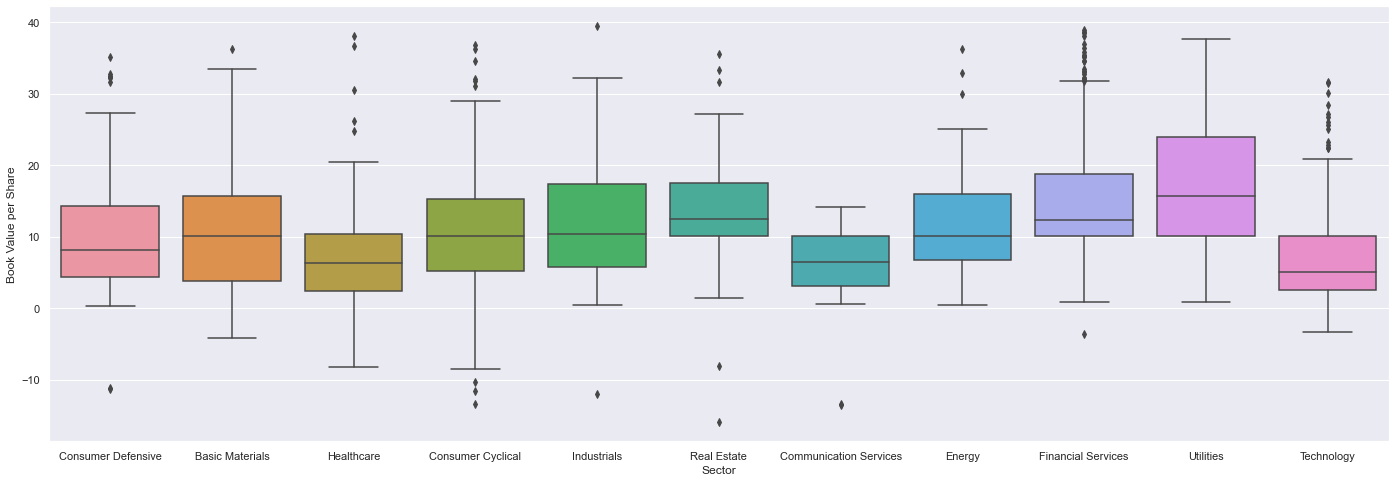

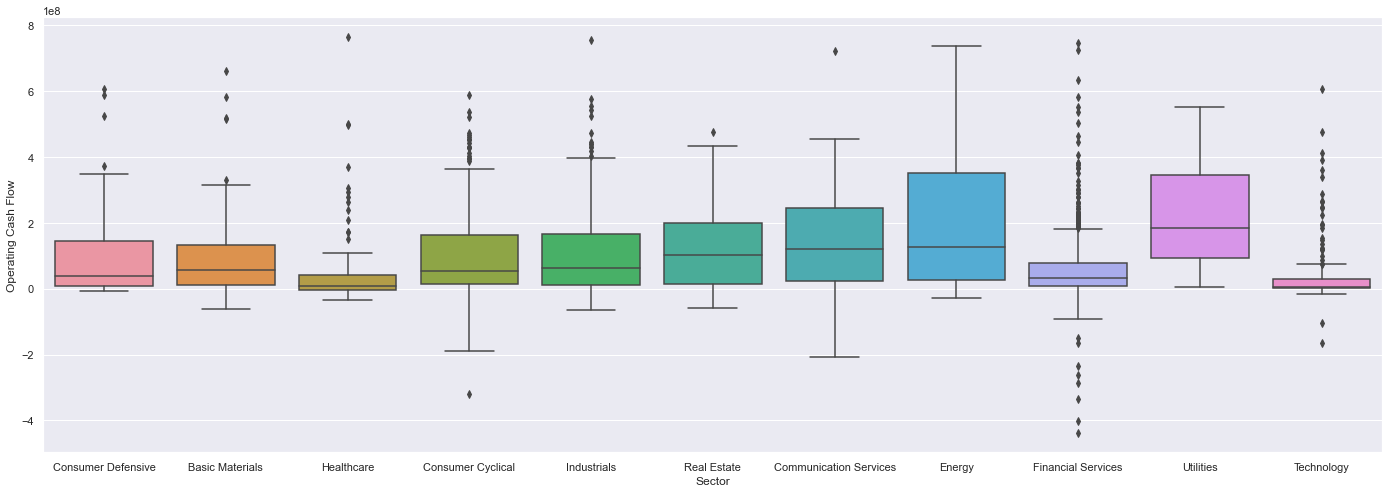

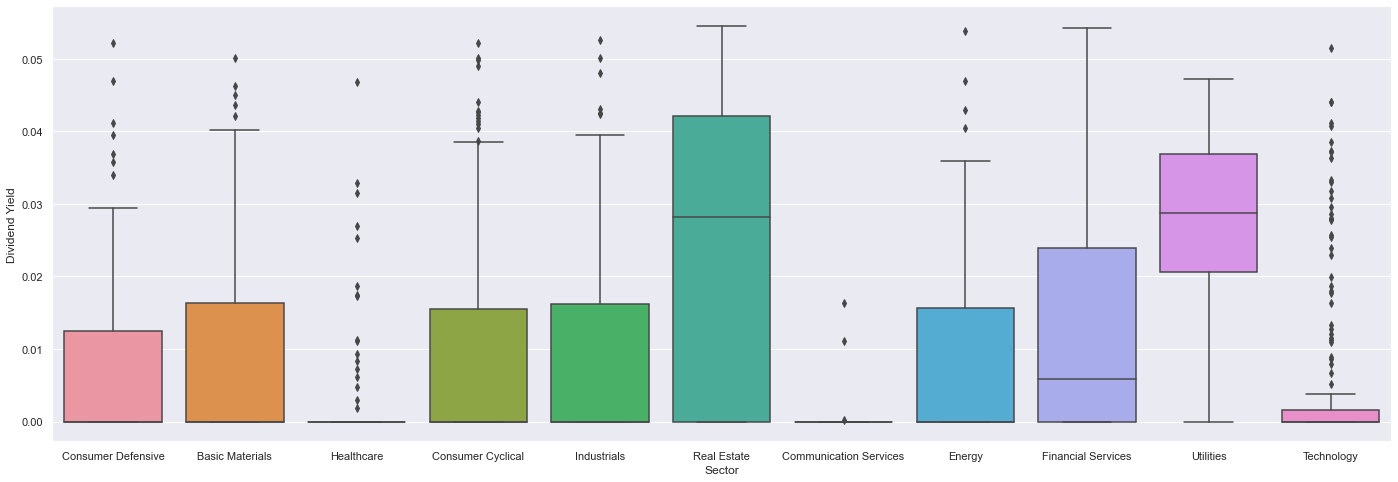

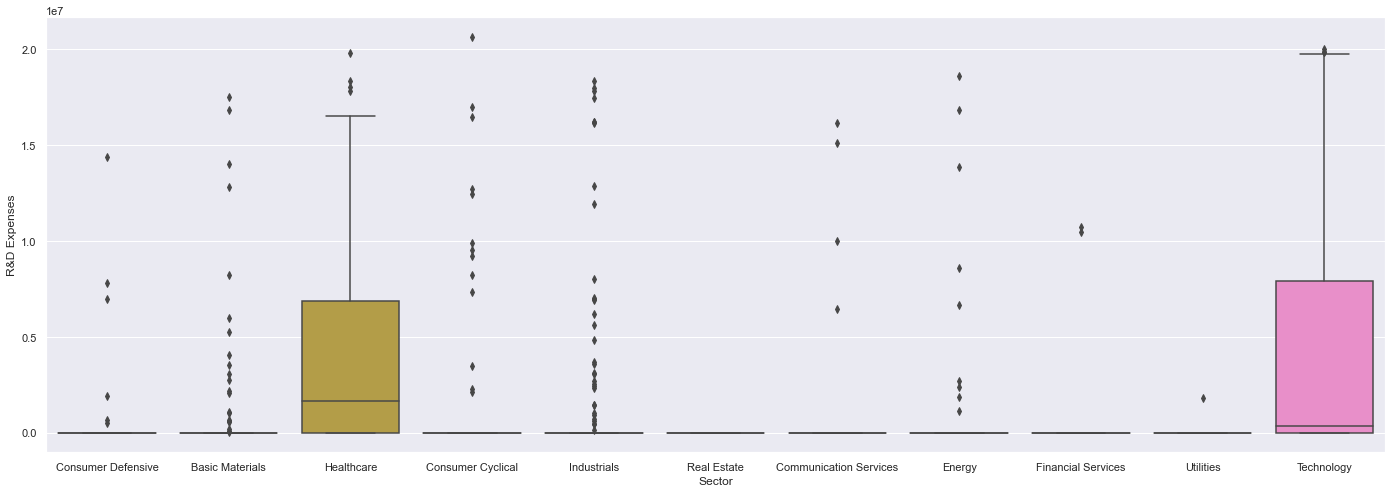

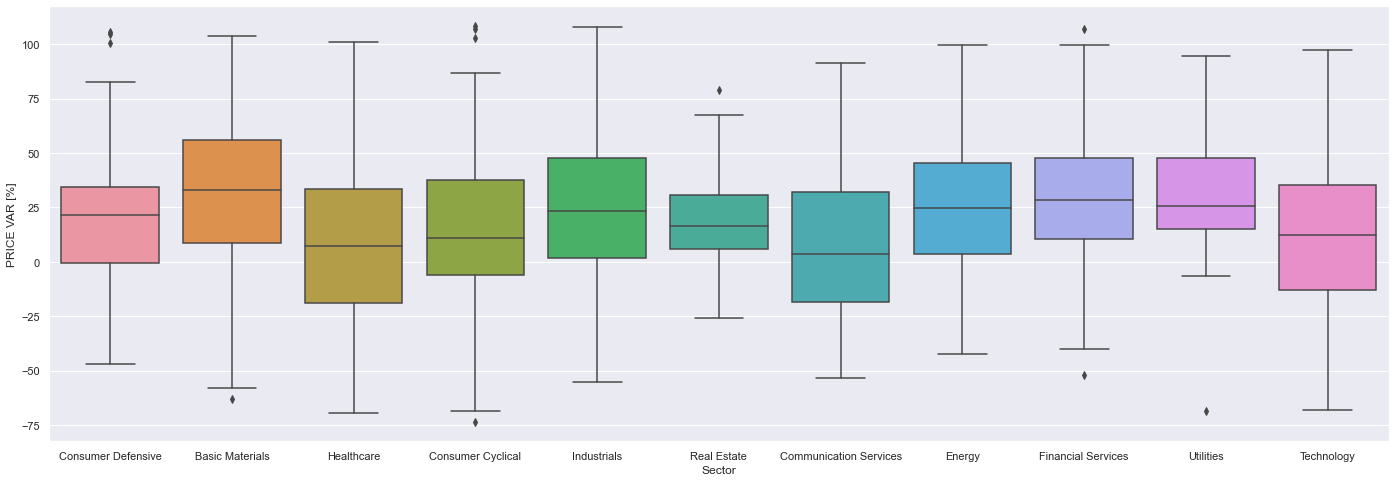

In [8]:
for factor in df.columns[0:-2]:
    f, axes = plt.subplots(1, 1, figsize=(24,8))
    sns.boxplot(x = 'Sector', y = factor, data = df, ax = axes)

In [9]:
# find percentage of stock that has 'buy' rating (Class = 1, PRICE VAR [%] > 0) in each Sector
for sector in df['Sector'].unique():
    buy_count = len(df.loc[(df['Class'] == 1) & (df['Sector'] == sector)])
    total_size = len(df.loc[df['Sector'] == sector])
    print(f'{sector} {round(100 * buy_count / total_size, 2)}%')

Consumer Defensive 74.12%
Basic Materials 83.81%
Healthcare 54.63%
Consumer Cyclical 67.53%
Industrials 77.52%
Real Estate 83.65%
Communication Services 52.38%
Energy 76.19%
Financial Services 86.8%
Utilities 88.89%
Technology 65.84%


## 2.2 Correlation Matrix

<AxesSubplot:>

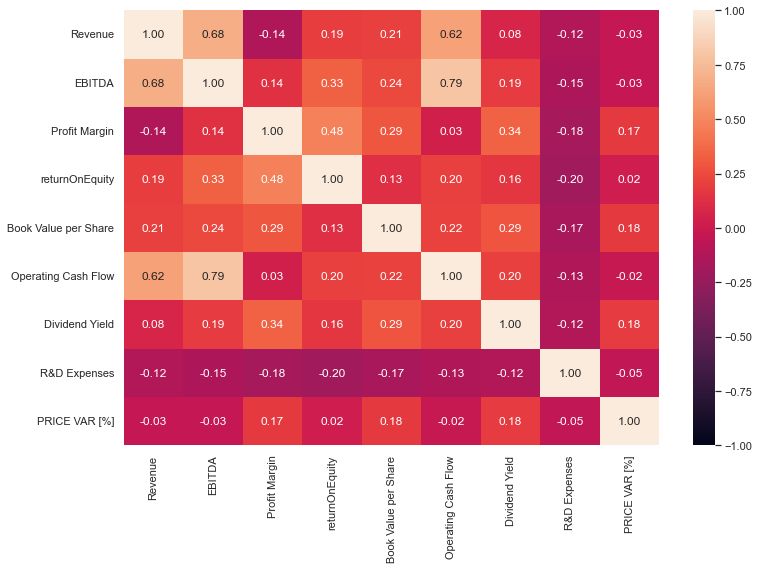

In [10]:
f, axes = plt.subplots(1, 1, figsize=(12,8))
sns.heatmap(df.iloc[:, :-2].corr(), vmin = -1, vmax = +1, annot=True, fmt='.2f')

There is no strong correlation between one specific indicator with PRICE VAR [%].
So we will use ML models to only predict Buy/Sell (Class = 1/0) from these indicators.